## Stroke Prediction-Descriptive and Predictive Model

### 1. Exploring Dataset in Pandas Dataframe 

In [1]:
# importing pandas to work on the stroke dataset
import pandas as pd 
# importing linear algebra
import numpy as np
# imporitng ststatics methods from scipy
from scipy import stats

In [2]:
#importing visualization packages
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing dataset into pandas dataframe
stroke_dataset = pd.read_csv("/Users/neha/Desktop/Studies Msc Data Analytics/Artificial Intelligence/healthcare-dataset-stroke-data 2.csv", delimiter = ',', encoding = 'utf-8')

In [47]:
stroke_dataset.head() #viewing the head of the dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# viewing the information such as many rows and columns, datatype and memory usage
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [56]:
# quantative information of categorical data
round (stroke_dataset.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [4]:
stroke_dataset.describe()# statistical information of numerical columns

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 2. Pre-processing and Missing Data Handling for Exploratory Analysis

In [5]:
stroke_dataset.drop('id', inplace=True, axis=1) # dropping id as its not required

In [6]:
#displays null values for each column
print(stroke_dataset.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


The dataset contains 201 null-values in BMI columns. BMI seems to be an important factor for a healthy person.Therfore instead of dropping it, median values would be filled in the null values data points

In [6]:
# handling missing values with filling BMI with median values
stroke_dataset['bmi'] = stroke_dataset['bmi'].fillna(round (stroke_dataset['bmi'].median(), 2))

In [8]:
stroke_dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
# viewing the head of the processed dataset after dropping id columns and filling median values in BMI variable.
stroke_dataset.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 3. Data Visualization & Quantative Analysis

### 3A Percentage of Stroke Patients

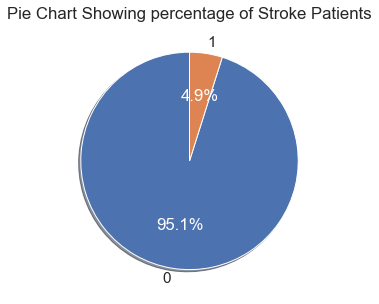

In [19]:
labels =stroke_dataset['stroke'].value_counts(sort = True).index
sizes = stroke_dataset['stroke'].value_counts(sort = True)
plt.figure(figsize=(5,5))
_, _,autotexts = plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Pie Chart Showing percentage of Stroke Patients')
plt.show()

In [179]:
print(f"The percentage of stroke patients are {round(sum(stroke_dataset['stroke'])/len(stroke_dataset) * 100,1)}%")


The percentage of stroke patients are 4.9%


### 3B Percentage of Hypertension Patients

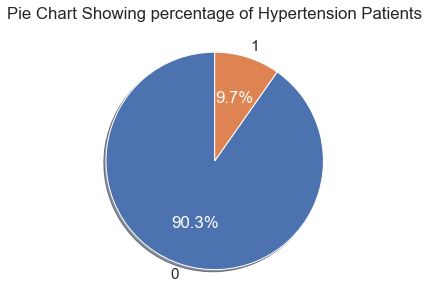

In [20]:
labels =stroke_dataset['hypertension'].value_counts(sort = True).index
sizes = stroke_dataset['hypertension'].value_counts(sort = True)
plt.figure(figsize=(5,5))
_, _,autotexts = plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Pie Chart Showing percentage of Hypertension Patients')
plt.show()

In [180]:
print(f"The percentage of stroke patients are {round(sum(stroke_dataset['hypertension'])/len(stroke_dataset) * 100,1)}%")


The percentage of stroke patients are 9.7%


### 3C Percentage of Heart Disease Patients

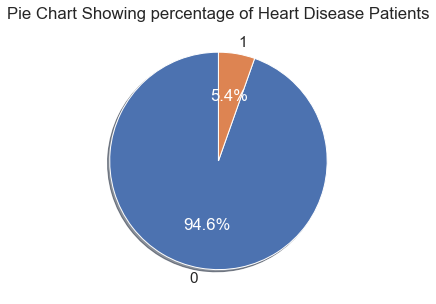

In [17]:
labels =stroke_dataset['heart_disease'].value_counts(sort = True).index
sizes = stroke_dataset['heart_disease'].value_counts(sort = True)
plt.figure(figsize=(5,5))
_, _,autotexts = plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Pie Chart Showing percentage of Heart Disease Patients')
plt.show()

In [181]:
print(f"The percentage of stroke patients are {round(sum(stroke_dataset['heart_disease'])/len(stroke_dataset) * 100,1)}%")

The percentage of stroke patients are 5.4%


### 3D Analysis with Age Column

#### a. Histogram showing distribution of Age

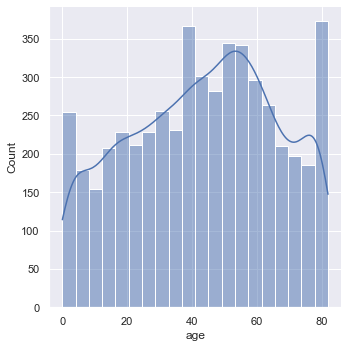

<Figure size 1080x504 with 0 Axes>

In [41]:
# This will plot a distribution plot of variable age
sns.displot(stroke_dataset['age'], kde=True)
plt.figure(figsize=(15,7))
plt.show()

#### b. Box Plot dipicting relation of Age with Stroke

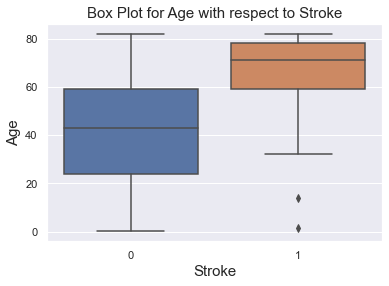

In [40]:
b = sns.boxplot(data=stroke_dataset,x='stroke', y='age')
b.axes.set_title("Box Plot for Age with respect to Stroke",fontsize=15)
b.set_xlabel("Stroke",fontsize=15)
b.set_ylabel("Age",fontsize=15)
plt.show()

### 3D Analysis with Average Glucose Level Column


#### a. Histogram showing distribution of Average Glucose Level

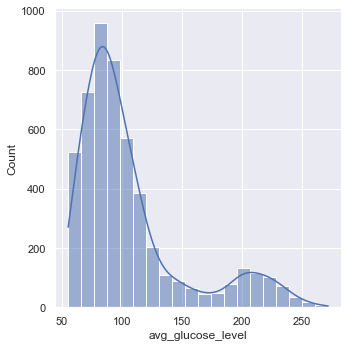

<Figure size 1080x504 with 0 Axes>

In [42]:
# This will plot a distribution plot of variable Average Glucose Level
sns.displot(stroke_dataset['avg_glucose_level'],kde=True, bins=20)
plt.figure(figsize=(15,7))
plt.show()

#### b. Box Plot of Average Glucose Level with respect to Stroke

Text(0, 0.5, 'Glucose Level')

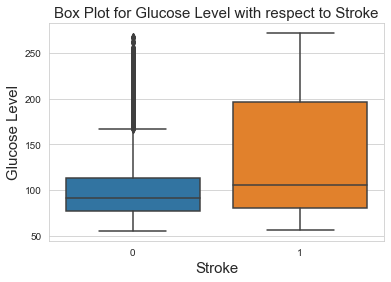

In [24]:
b = sns.boxplot(data=stroke_dataset,x='stroke', y='avg_glucose_level')
b.axes.set_title("Box Plot for Glucose Level with respect to Stroke",fontsize=15)
b.set_xlabel("Stroke",fontsize=15)
b.set_ylabel("Glucose Level",fontsize=15)
plt.show()

### 3E Analysis of Smoking Status Column

#### a.  Count of various categories in smoking_status category

In [24]:
# Unique Count for the categorical variable smoking status
print('Value Counts\n',stroke_dataset['smoking_status'].value_counts())

Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


#### b. Count Chart for Smoking Status Column

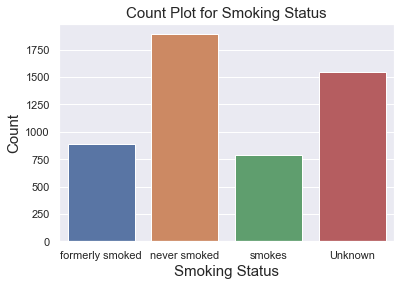

In [23]:
b = sns.countplot(data=stroke_dataset,x='smoking_status')
b.axes.set_title("Count Plot for Smoking Status",fontsize=15)
b.set_xlabel("Smoking Status",fontsize=15)
b.set_ylabel("Count",fontsize=15)
plt.show()

#### c. Bar Chart of Smoking Status in relation to Stroke

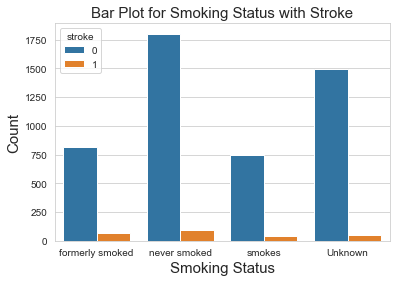

In [18]:
b = sns.countplot(data=stroke_dataset,x='smoking_status', hue='stroke')
b.axes.set_title("Bar Plot for Smoking Status with Stroke", fontsize=15)
b.set_ylabel("Count", fontsize=15)
b.set_xlabel("Smoking Status", fontsize=15)
plt.show()

### 3F Analysis of Work Type Column

#### a.  Count of various categories in Work Type category

In [26]:
print('Value Counts\n',stroke_dataset['work_type'].value_counts())

Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


#### b. Count Chart Work Type

Text(0, 0.5, 'Count')

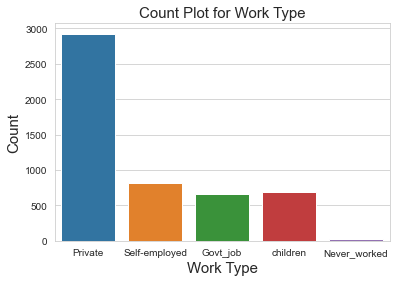

In [44]:
b = sns.countplot(data=stroke_dataset,x='work_type')
b.axes.set_title("Count Plot for Work Type", fontsize=15)
b.set_xlabel("Work Type",fontsize=15)
b.set_ylabel("Count",fontsize=15)

#### c. Bar Chart Work Type with respect to Stroke

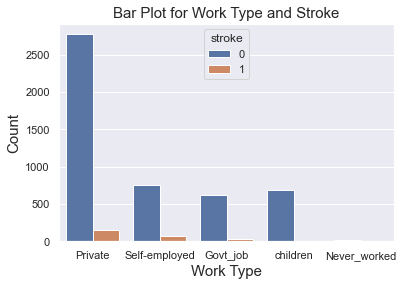

In [34]:
b = sns.countplot(data=stroke_dataset,x='work_type', hue='stroke')
b.axes.set_title("Bar Plot for Work Type and Stroke",fontsize=15)
b.set_xlabel("Work Type",fontsize=15)
b.set_ylabel("Count",fontsize=15)
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
plt.show()

### 3G Heat Map displaying Correlation in Numerical Columns

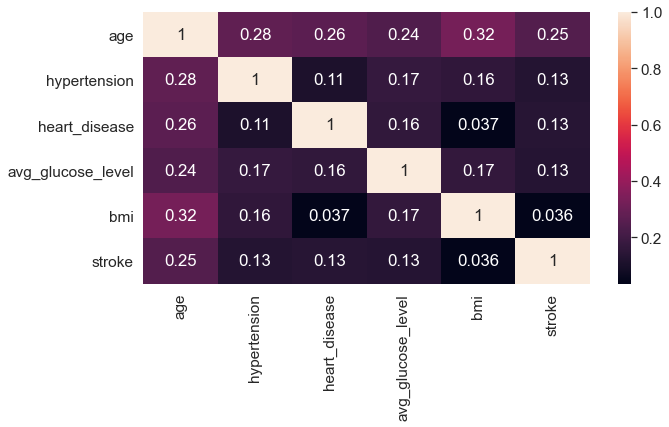

In [8]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,5))
b = sns.heatmap(stroke_dataset.corr(),annot=True)
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
plt.show()

Variables that are showing some effective correlation are:

age, hypertension, heart_disease, ever_married, avg_glucose_level.

## 4. Predictive Model using Random Forest Classification Model

### 4A  Data Cleaning for the Machine Learning Model

In [43]:
# Importing all the packages for the Machine learning Model
# importing the package for encoding the variables into numerical form
from sklearn.preprocessing import LabelEncoder

#importing SMOTE pakage for unbalanced dataset
from imblearn.over_sampling import SMOTE

#Let's split up the data into a training set and a test set!
from sklearn.model_selection import train_test_split

#importing the RandomForestClassifier for buliding predictive model
from sklearn.ensemble import RandomForestClassifier

# importing packages for accuracy metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

In [70]:
# creating the copy of the original stroke dataset
data = stroke_dataset.copy()

Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


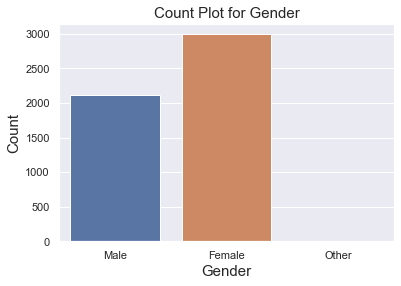

In [38]:
# visualizing gender column and droppong the 'other' record for data cleaning
print('Value Counts\n',stroke_dataset['gender'].value_counts())
b = sns.countplot(data=stroke_dataset,x='gender')
b.axes.set_title("Count Plot for Gender",fontsize=15)
b.set_xlabel("Gender",fontsize=15)
b.set_ylabel("Count",fontsize=15)
plt.show()

In [71]:
# dropping the 'other' entry from the gender column
data = data[data.gender != 'Other'].reset_index(drop=True) 

### 4B Label Encoding
Dataset is a mix of both categorical and numeric data and since ML algorithms understand data of numeric nature let’s encode our categorical data into numeric ones using Label Encoder. Label Encoder is a technique that will convert categorical data into numeric data. It takes value in ascending order and converts it into numeric data from 0 to n-1 which would be suitable for any machine learning model.

In [44]:
le = LabelEncoder() #creating the object of Label Encoder

In [77]:
#converting the string type into numerical data type

data.gender = le.fit_transform(data.gender)
data.ever_married = le.fit_transform(data.ever_married)
data.work_type = le.fit_transform(data.work_type)
data.Residence_type = le.fit_transform(data.Residence_type)
data.smoking_status = le.fit_transform(data.smoking_status)

In [78]:
data.head() # checking the head of the encoded dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


### 4C Handling Unbalanced Data (SMOTE Method)

This dataset is an imbalanced dataset so, I'll use SMOTE(Synthetic Minority Over-sampling Technique) to balance our dataset

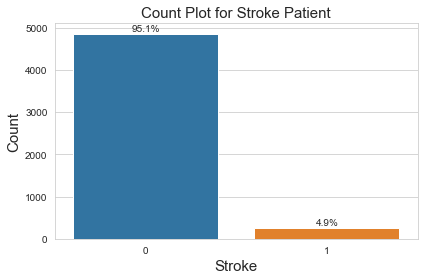

In [80]:
# bar Plot showing the percentage of stroke patients(unbalanced dataset)
ax = sns.countplot(data=data, x='stroke')
ax.axes.set_title("Count Plot for Stroke Patient", fontsize=15)
ax.set_xlabel("Stroke",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

plt.show()

In [81]:
X = data.drop('stroke', axis=1) # dropping the target variable stroke 
y = data.stroke

In [86]:
# splitting the data into 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
# Our data is biased, applying SMOTE
oversample = SMOTE() # creating the object from SMOTE package
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

In [100]:
X_train_res.shape, y_train_res.shape # retrieving the rows and columns in the training set

((6832, 10), (6832,))

In [118]:
# for creating the visualization of balanced dataset
#X_train_res1, y_train_res1 = oversample.fit_resample(X_train, y_train)
#bal_data = y_train_res1.to_frame() #  converting the training target column 'stroke' into dataframe

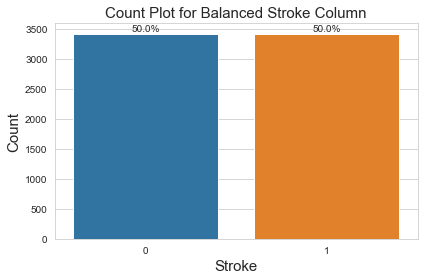

In [130]:
# bar Plot showing the percentage of stroke patients from the balanced dataset
b = sns.countplot(data=bal_data, x='stroke')
b.axes.set_title("Count Plot for Balanced Stroke Column", fontsize=15)
b.set_xlabel("Stroke",fontsize=15)
b.set_ylabel("Count",fontsize=15)
total = len(bal_data)
for p in b.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    b.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

plt.show()

### 4D Building Random forest Classification Model

In [159]:
# taking number of trees= 500, and depth=15
rfc = RandomForestClassifier(n_estimators=500,max_depth=15) 

# creating RF classifier model
rfc.fit(X_train_res, y_train_res) 

RandomForestClassifier(max_depth=15, n_estimators=500)

In [160]:
#creating prediction variable on test set
rfc_pred = rfc.predict(X_test)

In [161]:
# creating confusion matrix
print(confusion_matrix(y_test,rfc_pred))

[[1338  106]
 [  69   20]]


In [162]:
# creating classification_report test data set for target variable 'stroke'
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1444
           1       0.16      0.22      0.19        89

    accuracy                           0.89      1533
   macro avg       0.55      0.58      0.56      1533
weighted avg       0.90      0.89      0.89      1533



In [169]:
# printing the various classification accuracy metrics

print(f"Accuracy Score is {round(accuracy_score(y_test,rfc_pred), 2)}")
print("Recall score: {}".format(recall_score(y_test,rfc_pred)))
print("Precision score: {}".format(precision_score(y_test,rfc_pred)))
print("F1 Score: {}".format(f1_score(y_test,rfc_pred)))


Accuracy Score is 0.89
Recall score: 0.2247191011235955
Precision score: 0.15873015873015872
F1 Score: 0.18604651162790697
